# Case_Study_by_"Bhanu Prathap Velampati"
# Batch_ML_36

# Problem_Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
#importing all incessary libraries. Later remaining libraries also will be imported as and when required

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import day dataset and execute EDA and correlation between variables

In [3]:
bike_ds = pd.read_csv('day.csv')

In [4]:
bike_ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Check for any null values

In [6]:
bike_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#As per above info(), looks like no null values.
#Also confirm null values using below function

In [8]:
bike_ds.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Check the shape of day dataset

In [10]:
bike_ds.shape

(730, 16)

In [11]:
#Check some basic statistics of day dataset

In [12]:
bike_ds.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data cleaning::

In [13]:
#Select only object dtypes and see whether they can be covered to respective date/float/int

In [14]:
bike_ds.select_dtypes(include=['object']).dtypes

dteday    object
dtype: object

In [15]:
bike_ds.dteday.head()

0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
Name: dteday, dtype: object

In [16]:
#dteday variable has date data. Lets convert dtype to datetime

In [17]:
bike_ds.dteday=pd.to_datetime(bike_ds['dteday'],format='%d-%m-%Y')

In [18]:
bike_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
bike_ds.dteday.head() #Ensure no change is data format when connected to YYYY-MM-DD type

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: dteday, dtype: datetime64[ns]

In [20]:
bike_ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
#Lets Analyse mnth and yr columns. These variable's data is derived from dteday variable

In [22]:
bike_ds.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [23]:
#As per above data looks like data available for two years. 

In [24]:
bike_ds.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [25]:
#As per above data, data avaiable for 12 months in both two years

In [26]:
# looks like there is no much importance to day, so lets derive new columns Year and Month and check total months and year's 
# And compare with data in columns mnth,yr variable. If same then drop columns mnth,yr

In [27]:
bike_ds['year'] = pd.DatetimeIndex(bike_ds['dteday']).year
bike_ds['month'] = pd.DatetimeIndex(bike_ds['dteday']).month

In [28]:
bike_ds.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1


In [29]:
bike_ds.month.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64

In [30]:
bike_ds.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [31]:
# data from both mnth and month variables are same so mnth can be removed.

In [32]:
del(bike_ds['mnth'])

In [33]:
bike_ds.year.value_counts()

2018    365
2019    365
Name: year, dtype: int64

In [34]:
bike_ds.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [35]:
#As per above data 0 is assined for year 2018 and 1 for 2019. Don't delete yr variable. If required we can delete later

In [36]:
bike_ds.head(2)

,instant,dteday,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1


In [37]:
#Drop variables dteday,casual,registered,instant which are not required for analysis

In [38]:
bike_ds.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [39]:
bike_ds.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


# 2. Data Preparation 
    - Create dummy variables for all categorial variables
    - Divide data into train and test
    - perform scaling
    - Devide data into dependent and independent
    

## Univariate Analysis::

In [40]:
#Visualize pattern cnt data 

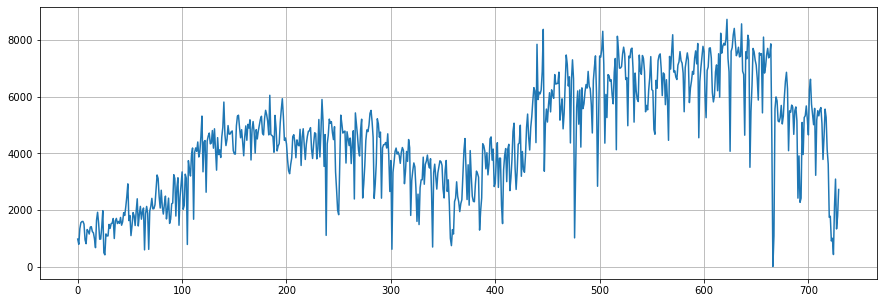

In [41]:
plt.figure(figsize=(15,5))
plt.plot(bike_ds.cnt)
plt.grid(True)
plt.show()

In [42]:
#As per above graph, demand was there for quite period of time and towards end of the dataset, there was sharp decline

In [43]:
#check for outliers in numerical variables 

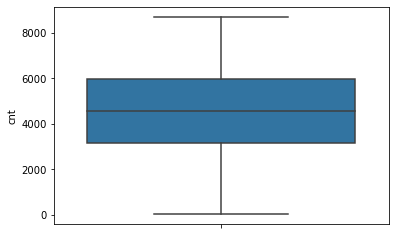

In [44]:
sns.boxplot(y=bike_ds.cnt)
plt.show()

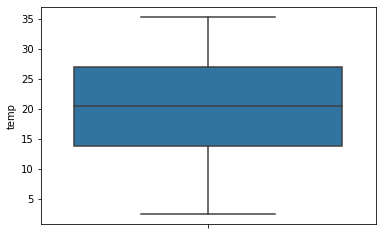

In [45]:
sns.boxplot(y=bike_ds.temp)
plt.show()

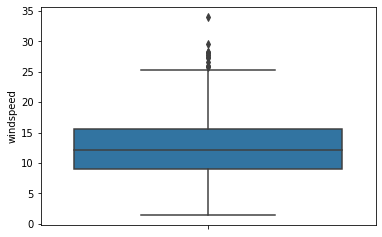

In [46]:
sns.boxplot(y=bike_ds.windspeed)
plt.show()

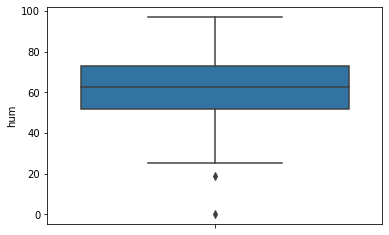

In [47]:
sns.boxplot(y=bike_ds.hum)
plt.show()

In [48]:
#As per boxplots, there are outliers in humidity and windspped

In [49]:
#lets update outliers with relevent data

In [50]:
#For humidity outliers are <18 percentile, please fill up with value which is close to IQR lowerbound

In [51]:
val75=bike_ds.hum.quantile(q=0.75)
val25=bike_ds.hum.quantile(q=0.25)

In [52]:
IQR=val75-val25

In [53]:
IQR_LL = int(val25-1.5*IQR)
IQR_LL

20

In [54]:
bike_ds[bike_ds.hum<18]

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
68,1,0,0,4,1,3,15.952731,19.2834,0.0,17.545759,623,2018,3


In [55]:
bike_ds.loc[bike_ds.hum<18, 'hum'] = 18.7917

In [56]:
bike_ds[bike_ds.hum<18]

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month


In [57]:
#For windspeed outliers are >30 percentile, please fill up with value which is close to IQR upperbound value

In [58]:
bike_ds[bike_ds.windspeed>30]

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
49,1,0,0,6,0,1,16.365847,19.5702,18.7917,34.000021,1635,2018,2


In [59]:
bike_ds.loc[bike_ds.windspeed>30, 'windspeed'] = 30

In [60]:
bike_ds[bike_ds.windspeed>30]

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month


## Bivariate Analysis::

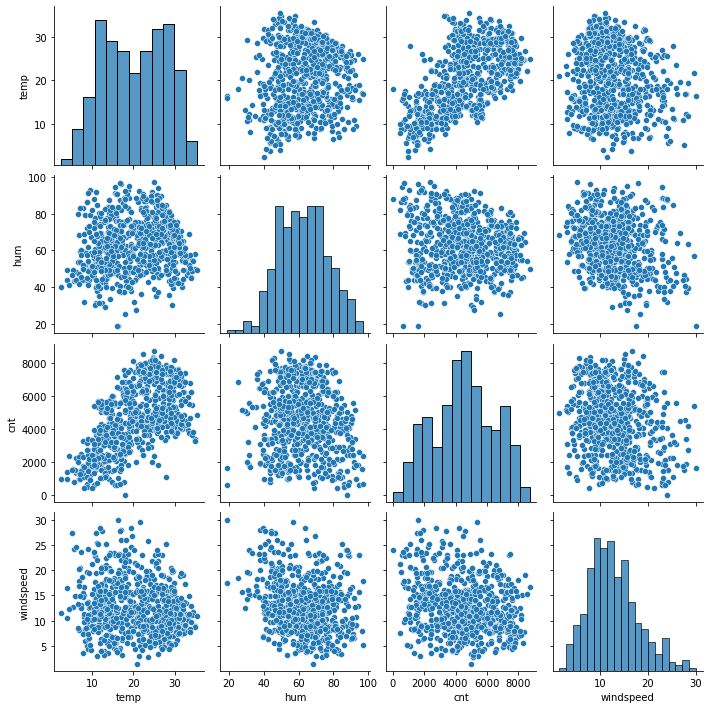

In [61]:
# pairplot to check correlation amond numerical features
sns.pairplot(bike_ds[['temp','hum','cnt','windspeed']])
plt.show()

In [62]:
bike_ds.temp.corr(bike_ds.cnt)

0.6270440344135153

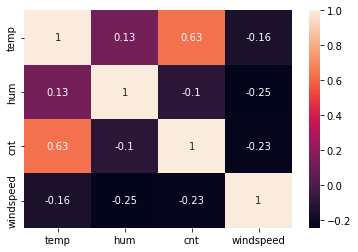

In [63]:
sns.heatmap(bike_ds[['temp','hum','cnt','windspeed']].corr(), annot=True)
plt.show()

In [64]:
#Among numerical features, temp is highly correlated with cnt

## Deleting features which are not significant to the analysis

In [65]:
# There is yr column which has 0:2018,1:2019, drop variable year

In [66]:
del(bike_ds['year'])

In [67]:
bike_ds.rename(columns={'yr':'year'},inplace=True)

In [68]:
bike_ds.head()

,season,year,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month
0,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1


In [69]:
# list down all categorical variables and encode data respective values

In [70]:
bike_ds.head()

,season,year,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month
0,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1


In [71]:
#categorical variables:
#Based on above data, categorical variables are season,weekday,workingday,weathersit,month

In [72]:
#Drop holiday whch is not required for analysis

In [73]:
del(bike_ds['holiday'])

## Encoding of categorical variables::
## Also includes univariate/bivariate analysis::

In [74]:
#Season variable is part of categorical variable for analysis, covert to encode this variable

In [75]:
bike_ds.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [76]:
#https://www.timeanddate.com/calendar/aboutseasons.html
#As per above link there are four seasons 
#Encoded value is  1. spring, 2. summer, 3. autumn, 4. winter

In [77]:
en_values = {1:'spring',2:'summer',3:'autumn',4:'winter'}
bike_ds['season'] = bike_ds['season'].map(en_values)

In [78]:
bike_ds.season.value_counts()

autumn    188
summer    184
spring    180
winter    178
Name: season, dtype: int64

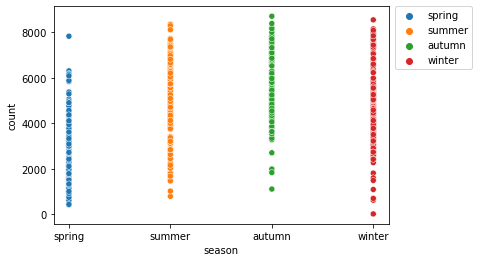

In [79]:
sns.scatterplot(x='season',y='cnt',data=bike_ds,hue='season')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("count")
plt.show()


In [80]:
#Create dummy variables from season variable

In [81]:
season_dummy_var = pd.get_dummies(bike_ds['season'],drop_first=True)

In [82]:
bike_ds = pd.concat([bike_ds,season_dummy_var],axis=1)

In [83]:
bike_ds.head(2)

,season,year,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,spring,summer,winter
0,spring,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0
1,spring,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0


In [84]:
#Check data in weekday variable

In [85]:
bike_ds.weekday.head()

0    6
1    0
2    1
3    2
4    3
Name: weekday, dtype: int64

In [86]:
#encode values like below
# 0: mon, 1: tues, 2:wed, 3:thur,4:Fri,5:sat,6:sun

In [87]:
weekday_code = {0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}
bike_ds['weekday'] = bike_ds['weekday'].map(weekday_code)

In [88]:
bike_ds.head()

,season,year,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,spring,summer,winter
0,spring,0,sun,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0
1,spring,0,mon,0,2,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0
2,spring,0,tue,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,1,0,0
3,spring,0,wed,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,1,0,0
4,spring,0,thu,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,1,0,0


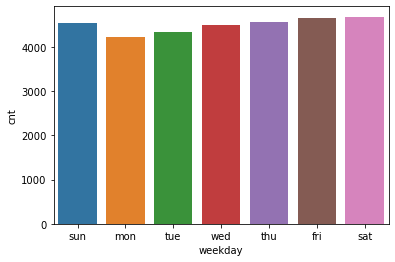

In [89]:
sns.barplot(x=bike_ds.weekday,y=bike_ds.cnt,ci=None)
plt.show()

In [90]:
#Create dummy variables

In [91]:
weekday_dummy_var = pd.get_dummies(bike_ds['weekday'],drop_first=True)

In [92]:
bike_ds = pd.concat([bike_ds,weekday_dummy_var],axis=1)

In [93]:
bike_ds.head()

,season,year,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,spring,summer,winter,mon,sat,sun,thu,tue,wed
0,spring,0,sun,0,2,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,1,0,0,0
1,spring,0,mon,0,2,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,1,0,0,0,0,0
2,spring,0,tue,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,1,0,0,0,0,0,0,1,0
3,spring,0,wed,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,1,0,0,0,0,0,0,0,1
4,spring,0,thu,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,1,0,0,0,0,0,1,0,0


In [94]:
#analyze data in workingday variable

In [95]:
bike_ds.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [96]:
#ecode values
#0: holiday,1:working days

In [97]:
workingday_code = {0:'Holiday',1:'working_day'}
bike_ds['workingday'] = bike_ds['workingday'].map(workingday_code)

In [98]:
bike_ds.head(5)

,season,year,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,spring,summer,winter,mon,sat,sun,thu,tue,wed
0,spring,0,sun,Holiday,2,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,1,0,0,0
1,spring,0,mon,Holiday,2,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,1,0,0,0,0,0
2,spring,0,tue,working_day,1,8.050924,9.47025,43.7273,16.636703,1349,1,1,0,0,0,0,0,0,1,0
3,spring,0,wed,working_day,1,8.200000,10.60610,59.0435,10.739832,1562,1,1,0,0,0,0,0,0,0,1
4,spring,0,thu,working_day,1,9.305237,11.46350,43.6957,12.522300,1600,1,1,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='workingday', ylabel='count'>

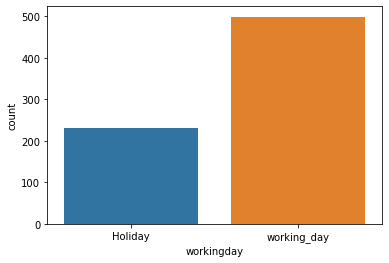

In [99]:
sns.countplot(x='workingday',data=bike_ds)

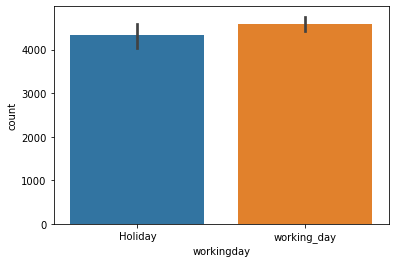

In [100]:
import warnings
warnings.filterwarnings('ignore')
sns.barplot('workingday','cnt',data=bike_ds)
plt.ylabel('count')
plt.show()

In [101]:
#create dummy variables

In [102]:
workingday_dummy_var = pd.get_dummies(bike_ds['workingday'],drop_first=True)
bike_ds = pd.concat([bike_ds,workingday_dummy_var],axis=1)

In [103]:
bike_ds.head()

,season,year,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,spring,summer,winter,mon,sat,sun,thu,tue,wed,working_day
0,spring,0,sun,Holiday,2,14.110847,18.18125,80.5833,10.749882,985,...,1,0,0,0,0,1,0,0,0,0
1,spring,0,mon,Holiday,2,14.902598,17.68695,69.6087,16.652113,801,...,1,0,0,1,0,0,0,0,0,0
2,spring,0,tue,working_day,1,8.050924,9.47025,43.7273,16.636703,1349,...,1,0,0,0,0,0,0,1,0,1
3,spring,0,wed,working_day,1,8.200000,10.60610,59.0435,10.739832,1562,...,1,0,0,0,0,0,0,0,1,1
4,spring,0,thu,working_day,1,9.305237,11.46350,43.6957,12.522300,1600,...,1,0,0,0,0,0,1,0,0,1


In [104]:
#analyze data in weathersit variable

In [105]:
bike_ds.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [106]:
#https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
#as per above link, econding values like below
#1:clear,2:mist,2.light snow,3:heavy rain

In [107]:
weathersit_code = {1:'clear',2:'mist',3:'light snow',4:'heavy rain'}
bike_ds['weathersit'] = bike_ds['weathersit'].map(weathersit_code)

In [108]:
bike_ds.head()

,season,year,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,spring,summer,winter,mon,sat,sun,thu,tue,wed,working_day
0,spring,0,sun,Holiday,mist,14.110847,18.18125,80.5833,10.749882,985,...,1,0,0,0,0,1,0,0,0,0
1,spring,0,mon,Holiday,mist,14.902598,17.68695,69.6087,16.652113,801,...,1,0,0,1,0,0,0,0,0,0
2,spring,0,tue,working_day,clear,8.050924,9.47025,43.7273,16.636703,1349,...,1,0,0,0,0,0,0,1,0,1
3,spring,0,wed,working_day,clear,8.200000,10.60610,59.0435,10.739832,1562,...,1,0,0,0,0,0,0,0,1,1
4,spring,0,thu,working_day,clear,9.305237,11.46350,43.6957,12.522300,1600,...,1,0,0,0,0,0,1,0,0,1


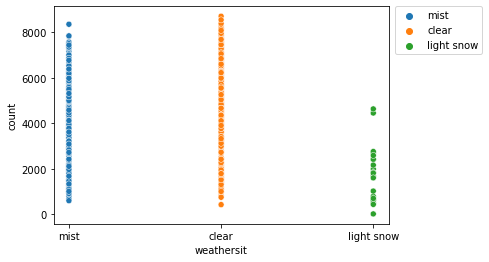

In [109]:
sns.scatterplot(bike_ds.weathersit,bike_ds.cnt,hue=bike_ds.weathersit)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("count")
plt.show()

In [110]:
#create dummy varaibles

In [111]:
weathersit_dummy_var = pd.get_dummies(bike_ds['weathersit'],drop_first=True)
bike_ds = pd.concat([bike_ds,weathersit_dummy_var],axis=1)

In [112]:
bike_ds.head()

,season,year,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,winter,mon,sat,sun,thu,tue,wed,working_day,light snow,mist
0,spring,0,sun,Holiday,mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,mon,Holiday,mist,14.902598,17.68695,69.6087,16.652113,801,...,0,1,0,0,0,0,0,0,0,1
2,spring,0,tue,working_day,clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,1,0,1,0,0
3,spring,0,wed,working_day,clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,1,1,0,0
4,spring,0,thu,working_day,clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,1,0,0,1,0,0


In [113]:
#analyze data in month variable

In [114]:
bike_ds.month.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64

In [115]:
#encode data like below
# 1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'

In [116]:
month_code = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
bike_ds['month'] = bike_ds['month'].map(month_code)

In [117]:
#Check month data based on year using scatter plot

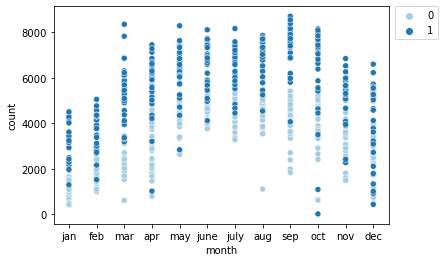

In [118]:
sns.scatterplot('month','cnt',hue='year',data=bike_ds,palette='Paired')
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [119]:
#create dummy variables

In [120]:
month_dummy_var = pd.get_dummies(bike_ds['month'],drop_first=True)
bike_ds = pd.concat([bike_ds,month_dummy_var],axis=1)

In [121]:
bike_ds.head()

,season,year,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,spring,0,sun,Holiday,mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,mon,Holiday,mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,tue,working_day,clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,wed,working_day,clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,thu,working_day,clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [122]:
bike_ds.columns

Index(['season', 'year', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'month', 'spring', 'summer',
       'winter', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'working_day',
       'light snow', 'mist', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep'],
      dtype='object')

In [123]:
#As dummy variables created for columns season,weekday,workingday,weathersit,month, these variables can be dropped

In [124]:
bike_ds.drop(['season','weekday','workingday','weathersit','month'],axis=1,inplace=True)

In [125]:
bike_ds.head()

,year,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mon,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [126]:
bike_ds.columns

Index(['year', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'working_day',
       'light snow', 'mist', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep'],
      dtype='object')

In [127]:
#Correlate temp and atemp variables

In [128]:
bike_ds[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


In [129]:
#drop atemp variable

In [130]:
del(bike_ds['atemp'])

In [131]:
bike_ds.head(2)

,year,temp,hum,windspeed,cnt,spring,summer,winter,mon,sat,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,14.902598,69.6087,16.652113,801,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [132]:
#check bike rentals on different temparatures

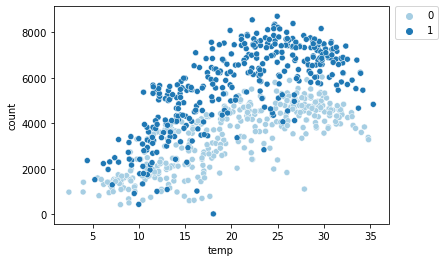

In [133]:
sns.scatterplot('temp','cnt',hue='year',data=bike_ds,palette='Paired')
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [134]:
#bike rentals are more when temperature high and rentals are more in 2019 when compared to 2019

In [135]:
#Check rentals when humidity more

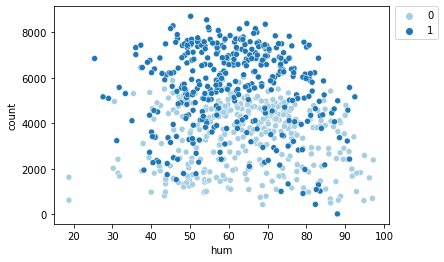

In [136]:
sns.scatterplot('hum','cnt',hue='year',data=bike_ds,palette='Paired')
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [137]:
#rentals are more when humidity is between 40 and 85.

In [138]:
#correlated temp,humidity and widspeed

In [139]:
bike_ds[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.128386,-0.158250
hum,0.128386,1.000000,-0.246211
windspeed,-0.158250,-0.246211,1.000000


## splitting data into training and test dataset

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
df_bike_train, df_bike_test = train_test_split(bike_ds, test_size=0.3,random_state=100)

In [142]:
df_bike_test.shape #30% of data

(219, 28)

In [143]:
df_bike_train.shape #70% of data

(511, 28)

In [144]:
#Apply scalling for numerical variables

In [145]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [146]:
numvars=['temp','hum','windspeed','cnt']

df_bike_train[numvars]= scaler.fit_transform(df_bike_train[numvars])

In [147]:
df_bike_train.head()

,year,temp,hum,windspeed,cnt,spring,summer,winter,mon,sat,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
653,1,0.509887,0.473375,0.345084,0.864243,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0.815169,0.659744,0.303659,0.827658,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0.442393,0.553780,0.292941,0.465255,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0.245101,0.377528,0.760746,0.204096,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0.395666,0.385516,0.216227,0.482973,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


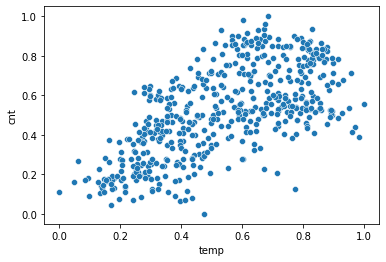

In [148]:
sns.scatterplot('temp','cnt',data=df_bike_train)
plt.show()

In [149]:
#After scalling there is no change in plots, so scalling applied properly

In [150]:
#Dividing data in dependent variable and independent variables

In [151]:
y_train = df_bike_train.pop('cnt')
X_train = df_bike_train

# 3. Model building and Evaluation

In [152]:
#Execute liniear regression and RFE concept

In [153]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [154]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [155]:
# running with 10 independent variables
rfe = RFE(lm,10)
rfe = rfe.fit(X_train, y_train)

In [156]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', False, 4),
 ('mon', False, 3),
 ('sat', False, 15),
 ('sun', True, 1),
 ('thu', False, 17),
 ('tue', False, 12),
 ('wed', False, 13),
 ('working_day', False, 2),
 ('light snow', True, 1),
 ('mist', True, 1),
 ('aug', False, 11),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('july', True, 1),
 ('june', False, 16),
 ('mar', False, 18),
 ('may', False, 10),
 ('nov', False, 7),
 ('oct', False, 14),
 ('sep', True, 1)]

In [157]:
#Get olny RFE.support true variables for analysis

In [158]:
newvars = X_train.columns[rfe.support_]
newvars

Index(['year', 'temp', 'hum', 'windspeed', 'spring', 'sun', 'light snow',
       'mist', 'july', 'sep'],
      dtype='object')

In [159]:
# Creating X_train dataset with selected rfe's as true
X_train_rfetrue = X_train[newvars]

In [160]:
#Add a constant variable

In [161]:
import statsmodels.api as sm  
X_train_rfetrue = sm.add_constant(X_train_rfetrue)

In [162]:
# Running model

In [163]:
lm = sm.OLS(y_train,X_train_rfetrue).fit()

In [164]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.4
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.34e-184
Time:                        13:07:40   Log-Likelihood:                 488.62
No. Observations:                 511   AIC:                            -955.2
Df Residuals:                     500   BIC:                            -908.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3540      0.025     14.041      0.000       0.304       0.404
year           0.2337      0.008     27.662      0.000       0.217       0.250
temp           0.4100      0.027     15.399      0.000       0.358       0.462
hum           -0.1043      0.032     -3.282      0.001      -0.167      -0.042
windspeed     -0.1578      0.023     -6.781      0.000      -0.204      -0.112
spring        -0.1487      0.012    -11.963      0.000      -0.173      -0.124
sun            0.0205      0.012      1.773      0.077      -0.002       0.043
light snow    -0.2370      0.028     -8.547      0.000      -0.292      -0.183
mist          -0.0590      0.011     -5.416      0.000      -0.080      -0.038
july          -0.0800      0.018     -4.490      0.000      -0.115      -0.045
sep            0.0548      0.016      3.406      0.001       0.023       0.086
==============================================================================
Omnibus:                       59.088   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.622
Skew:                          -0.641   Prob(JB):                     1.17e-28
Kurtosis:                       5.097   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
#in the summery noticed  dummy variable mon shows p value is 0.071 which is insignificant i,e >0.05

In [166]:
X_train_= X_train_rfetrue.drop('sun',1)

In [167]:
X_train__= sm.add_constant(X_train_)
lm_ = sm.OLS(y_train,X_train__).fit() 

In [168]:
lm_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     266.7
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          9.47e-185
Time:                        13:07:40   Log-Likelihood:                 487.02
No. Observations:                 511   AIC:                            -954.0
Df Residuals:                     501   BIC:                            -911.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3590      0.025     14.298      0.000       0.310       0.408
year           0.2332      0.008     27.559      0.000       0.217       0.250
temp           0.4089      0.027     15.329      0.000       0.356       0.461
hum           -0.1071      0.032     -3.369      0.001      -0.170      -0.045
windspeed     -0.1569      0.023     -6.729      0.000      -0.203      -0.111
spring        -0.1489      0.012    -11.953      0.000      -0.173      -0.124
light snow    -0.2353      0.028     -8.471      0.000      -0.290      -0.181
mist          -0.0583      0.011     -5.343      0.000      -0.080      -0.037
july          -0.0796      0.018     -4.455      0.000      -0.115      -0.044
sep            0.0550      0.016      3.415      0.001       0.023       0.087
==============================================================================
Omnibus:                       53.578   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.462
Skew:                          -0.561   Prob(JB):                     5.71e-28
Kurtosis:                       5.153   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
#X_train_new= X_train__.drop('const',axis=1)

In [170]:
#Check Variation inflation factor i,e VIF

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [172]:
vif = pd.DataFrame()
X = X_train__
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.29
2,temp,2.08
3,hum,1.86
5,spring,1.64
7,mist,1.55
8,july,1.29
6,light snow,1.27
4,windspeed,1.17
9,sep,1.10
1,year,1.03


All independent variables (except constant) VIF value is <5 which is good

In [173]:
#X_train__= X_train__.drop('hum',axis=1)
#X_train__= X_train__.drop('temp',axis=1)

In [174]:
X_train__= sm.add_constant(X_train__)
lm__= sm.OLS(y_train,X_train__).fit() 

In [175]:
lm__.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     266.7
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          9.47e-185
Time:                        13:07:40   Log-Likelihood:                 487.02
No. Observations:                 511   AIC:                            -954.0
Df Residuals:                     501   BIC:                            -911.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3590      0.025     14.298      0.000       0.310       0.408
year           0.2332      0.008     27.559      0.000       0.217       0.250
temp           0.4089      0.027     15.329      0.000       0.356       0.461
hum           -0.1071      0.032     -3.369      0.001      -0.170      -0.045
windspeed     -0.1569      0.023     -6.729      0.000      -0.203      -0.111
spring        -0.1489      0.012    -11.953      0.000      -0.173      -0.124
light snow    -0.2353      0.028     -8.471      0.000      -0.290      -0.181
mist          -0.0583      0.011     -5.343      0.000      -0.080      -0.037
july          -0.0796      0.018     -4.455      0.000      -0.115      -0.044
sep            0.0550      0.016      3.415      0.001       0.023       0.087
==============================================================================
Omnibus:                       53.578   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.462
Skew:                          -0.561   Prob(JB):                     5.71e-28
Kurtosis:                       5.153   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
#X_train_new= X_train__.drop('const',axis=1)

Residual Analysis of train data

In [177]:
y_train_pred = lm_.predict(X_train__)

Text(0.5, 0, 'Errors')

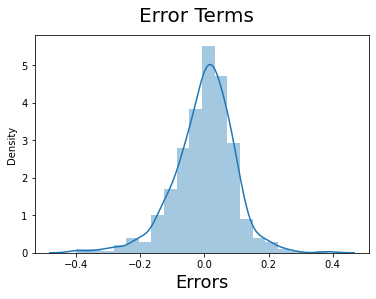

In [178]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [179]:
X_train__.drop(['const'], axis = 1, inplace = True)

# Making predictions

In [180]:
numvars=['temp','hum','windspeed','cnt']

df_bike_test[numvars]= scaler.transform(df_bike_test[numvars])


In [181]:
#Dividing into X_test and y_test

In [182]:
y_test = df_bike_test.pop('cnt')
X_test = df_bike_test

In [183]:
X_train__.columns

Index(['year', 'temp', 'hum', 'windspeed', 'spring', 'light snow', 'mist',
       'july', 'sep'],
      dtype='object')

In [184]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train__.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [185]:
# Making predictions
y_test_pred = lm_.predict(X_test_new)

In [186]:
lm_.params

const         0.358992
year          0.233215
temp          0.408894
hum          -0.107120
windspeed    -0.156895
spring       -0.148879
light snow   -0.235295
mist         -0.058314
july         -0.079565
sep           0.055032
dtype: float64

# Model evaluation

Text(0, 0.5, 'Predictions')

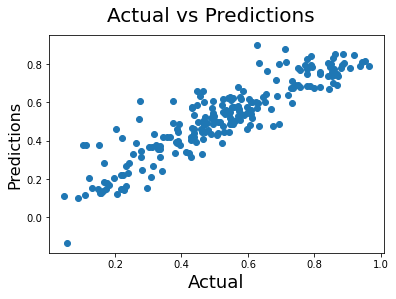

In [187]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)                          # Y-label

In [188]:
from sklearn.metrics import r2_score

In [189]:
print( "Test data R2 value:", r2_score(y_test, y_test_pred))

Test data R2 value: 0.8113622892963182


In [190]:
# Adjusted R-Squared for test dataset
N= len(X_test)         
p =len(X_train__.columns)
r2_test_score = 0.8113622892963182
r2_test_adj = round((1-((1-r2_test_score)*(N-1)/(N-p-1))),5)
print('Adjusted R-Squared for Test dataset: ', round(r2_test_adj,5))

Adjusted R-Squared for Test dataset:  0.80324


In [191]:
print( "Training data R2 value:", r2_score(y_train, y_train_pred))

Training data R2 value: 0.827335322792071


In [192]:
# Adjusted R-Squared for train dataset
N= len(X_train)         
p =len(X_train__.columns)     
r2_train_score = 0.827335322792071
r2_train_adj = round((1-((1-r2_train_score)*(N-1)/(N-p-1))),5)
print('Adjusted R-Squared for Train dataset: ', round(r2_train_adj,5))

Adjusted R-Squared for Train dataset:  0.82423


In [193]:
vif = pd.DataFrame()
X = X_test_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.40
2,temp,2.37
3,hum,2.28
5,spring,1.87
7,mist,1.74
6,light snow,1.50
8,july,1.41
4,windspeed,1.24
9,sep,1.16
1,year,1.07


## Conclusion:
    Based on the final model, top 3 features contributing are
	- temp, 0.4089
	- weathersit, -0.2936(Light Snow: -0.2353,Mist: -0.0583)
	- Year, 0.2332

    
    

In [194]:
print( "R-Squared for Training data:", round(r2_score(y_train, y_train_pred),5))
print('Adjusted R-Squared for Train dataset: ', round(r2_train_adj,5))
#------------------------------------------------
print( "R-Squared for Test data:", round(r2_score(y_test, y_test_pred),5))
print('Adjusted R-Squared for Test dataset: ', round(r2_test_adj,5))

R-Squared for Training data: 0.82734
Adjusted R-Squared for Train dataset:  0.82423
R-Squared for Test data: 0.81136
Adjusted R-Squared for Test dataset:  0.80324


# Assumptions of Linear Regression:
    The error terms are normally distributed.
    The training and testing accuracy are nearly equal.
    The predicted values have linear relationship with the actual values